# **Homework 3**

---


# ***Which Fruit Is It?***

NOTE: The deadline is in 10 days!

The starter notebook for this homework is hw3_starter.ipynb. You must use the output already provided in the notebook, because we will be grading automatically.

In this homework your goal is to identify fruit based on the following attributes: mass, width, height and color. The data set is slightly permutated  and is available here: https://raw.githubusercontent.com/lkyin/ECS189L/main/fruits.csv

Specifically, your goal is to:

1. Build a logistic regression classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score. Make sure the model is:
- the best one you can get (based on area under the ROC), and
- is not overfitted (use cross validation).
- ***What to report: a) the model coefficients, b) confusion matrix, and c) the area under ROC of your best model.***

2. Here, build a decision tree classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score (You are welcome to use regularization, but it is not required). Make sure the model is:
- the best one you can get (based on accuracy on test data),
- is not overfitted (use cross validation).
- ***What to report: a) plot of the decision tree and b) the accuracy of your best model on the test data.***

3. Draw the decision boundaries for the two models above and consider their performance vis-a-vis the decision boundaries. Answer the following question in a text cell. What to report:

- ***What do you notice in terms of the relationship between model performance and decision boundary for each model?***


##  ***Load the Data Set***

In [1]:
# required imports 
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pylab as pl
import scipy.stats as stats
#  for logistic reg.
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# load the data
df = pd.read_csv('https://raw.githubusercontent.com/lkyin/ECS189L/main/fruits.csv', index_col=[0])

In [2]:
# overview 
df.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,198.04,8.47,7.29,0.54
1,1,apple,granny_smith,169.98,7.84,6.41,0.59
2,1,apple,granny_smith,183.37,7.58,7.62,0.60
3,2,mandarin,mandarin,88.73,6.31,4.55,0.82
4,2,mandarin,mandarin,80.54,6.30,4.83,0.83
5,2,mandarin,mandarin,80.63,5.77,4.23,0.80
6,2,mandarin,mandarin,82.66,5.92,4.11,0.77
7,2,mandarin,mandarin,73.22,5.70,3.96,0.86
8,1,apple,braeburn,178.29,7.17,7.50,0.95
9,1,apple,braeburn,166.64,7.67,6.88,0.84


Data cleaning and outlier removal 

In [3]:
Nan_values=df.isnull().sum().sort_values(ascending=False)
Nan_values# checking for null  values 


color_score      0
height           0
width            0
mass             0
fruit_subtype    0
fruit_name       0
fruit_label      0
dtype: int64

- checking the box plot to understand the outliers 

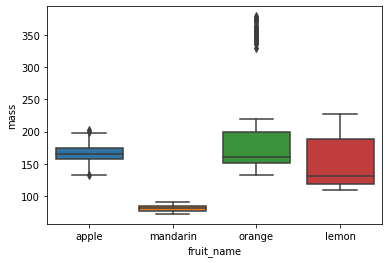

In [4]:
ax = sns.boxplot(x="fruit_name", y="mass", data=df)

- we can see that apples and oranges have outlier for the mass feature 
- also , this feature doesnt completely help us differentiate bettwen different fruits 

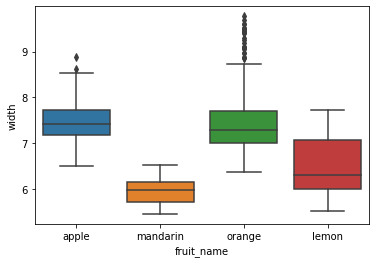

In [5]:
ax = sns.boxplot(x="fruit_name", y="width", data=df)

- again we notice outliers for apples and oranges 
- also , this feature doesnt completely help us differentiate bettwen different fruits . as apples and oranges have simlar width's
- this may , later show up as lesser classification accuracy for one of them 


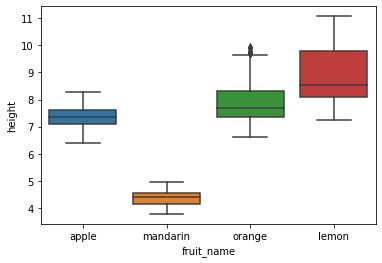

In [6]:
ax = sns.boxplot(x="fruit_name", y="height", data=df)

- There is some outlier for oranges , but the rest are fine
- this deature provides us a much better seperation/ prediction power 

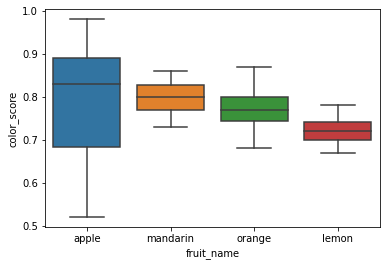

In [7]:
ax = sns.boxplot(x="fruit_name", y="color_score", data=df)

- this has no outliers and it might not provide a very good classification power alone 

Now we work to correct the outlier(s) that we noticed in the box plots 

In [8]:
df.shape

#shape before the outlier removal 

(590, 7)

- removing the outliers , based on the box plots 

In [9]:
m_o=df[df['mass']>300].index
df.drop(m_o, inplace=True)
w_o=df[df['width']>8.5].index
df.drop(w_o, inplace=True)
orange_out=df[(df['fruit_name']=='orange') & (df['mass']>178)].index
df.drop(orange_out, inplace=True)
orange_out=df[(df['fruit_name']=='orange') & (df['height']>8.7)].index
df.drop(orange_out, inplace=True)
df.shape

(522, 7)

## ***Q1. Build a logistic regression classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score. Make sure the model is:***
- the best one you can get (based on area under the ROC), and
- is not overfitted (use cross validation).
- ***What to report: a) the model coefficients, b) confusion matrix, and c) the area under ROC of your best model.***

### Select the dependent variable, and your independent variables of interest.

In [38]:
data=df[['mass','width','height','color_score']].values
target=df['fruit_label'].to_numpy()
target_names=df.fruit_name.unique().astype('<U10')
X=data
X_norm = stats.zscore(X)
# YOUR CODE
y=target 

# YOUR CODE
X = X_norm
#  perform the label binarize method 
y = label_binarize(y, classes=[1,2,3,4])
classes = target_names

### Split Training and Testing Using sklearn

In [39]:
from sklearn.model_selection import train_test_split

# YOUR CODE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Build your model(s) with traning X and Training Y

In [40]:
# YOUR CODE
#  using the One V.S. All classifier
clf = OneVsRestClassifier(LogisticRegressionCV())
y_score = clf.fit(X_train, y_train).decision_function(X_test)
print('Done training.')
predictions=clf.predict(X_test)

Done training.


### Show the summary of your best model(s)

- Confusion matrix 

In [41]:
conf_matrix = metrics.multilabel_confusion_matrix(y_test, predictions)
print('Confusion matix for Apples')
print(conf_matrix[0,:,:])
print('----------------------------')
print('Confusion matix for mandarin')
print(conf_matrix[1,:,:])
print('----------------------------')
print('Confusion matix for orange')
print(conf_matrix[2,:,:])
print('----------------------------')
print('Confusion matix for lemon')
print(conf_matrix[3,:,:])


Confusion matix for Apples
[[69  9]
 [ 4 23]]
----------------------------
Confusion matix for mandarin
[[95  0]
 [ 0 10]]
----------------------------
Confusion matix for orange
[[73  0]
 [32  0]]
----------------------------
Confusion matix for lemon
[[69  0]
 [ 2 34]]


- coefficients of the model 

In [42]:
print('coefficient matix for Apples')
print(clf.coef_[0,:])
print('----------------------------')
print('coefficient matix for mandarin')
print(clf.coef_[1,:])
print('----------------------------')
print('coefficient matix for orange')
print(clf.coef_[2,:])
print('----------------------------')
print('coefficient matix for lemon')
print(clf.coef_[3,:])

coefficient matix for Apples
[ 2.36075879  1.99919164 -2.68131741  0.56017712]
----------------------------
coefficient matix for mandarin
[-0.8137263  -0.43577444 -1.03482879  0.12168144]
----------------------------
coefficient matix for orange
[ 0.00127385  0.00253628 -0.00070489  0.00162118]
----------------------------
coefficient matix for lemon
[-2.25474476 -4.38716653 11.16035197 -1.62181691]


- cross val score 

In [43]:
from sklearn.model_selection import cross_val_score
dt_scores =cross_val_score(clf,X_train,y_train,cv=10)
print(dt_scores.mean())

0.6855981416957027


### Plot the ROC curve(s) and show the AUC value(s).

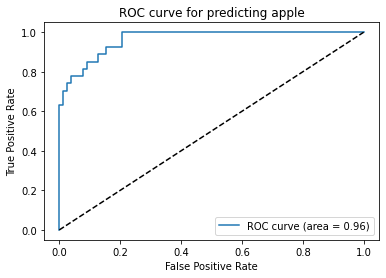

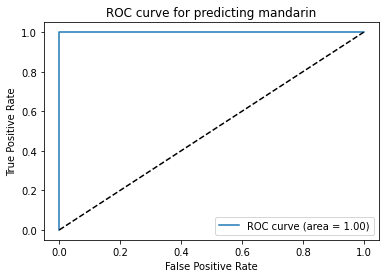

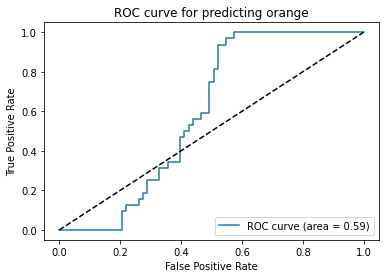

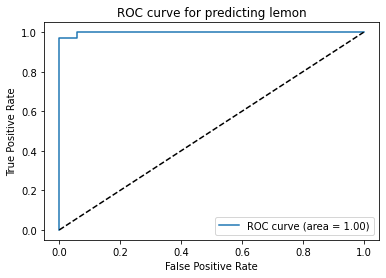

In [44]:
# YOUR CODE
fpr = {}
tpr = {}
roc_auc = {}

# interate through each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, classname in enumerate(classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for predicting {}'.format(classname))
    plt.legend(loc="lower right")
    plt.show()

- the better the model performs for apple , the worser it performs for orange ,this might be due to the fact that some of the features between might be simlar 

## ***Q2. Build a decision tree classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score. Make sure the model is:***
- the best one you can get (based on accuracy on test data),
- is not overfitted (use cross validation).
- ***What to report: a) plot of the decision tree and b) the accuracy of your best model on the test data.***



In [17]:
df.shape

(522, 7)

In [56]:
# YOUR CODE HERE 
target=df['fruit_label'].to_numpy()
data=df[['mass','width','height','color_score']].values
X=data
X = stats.zscore(X)
y=target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7)

Testing the right alpha value for the decision trees using code simlar to 'https://scikit-learn.org/0.22/auto_examples/tree/plot_cost_complexity_pruning.html'

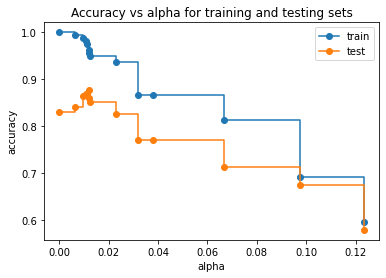

In [57]:
# YOUR CODE HERE 
clf = DecisionTreeClassifier(random_state=0)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()



In [58]:
# YOUR CODE HERE 
clf = DecisionTreeClassifier(ccp_alpha=0.017).fit(X_train, y_train)

In [59]:
# YOUR CODE HERE 
print('Accuracy of Decision Tree classifier on training set: {:.2f}' .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on testing set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on testing set: 0.85


- cross valuation 

In [60]:
from sklearn.model_selection import cross_val_score
dt_scores =cross_val_score(clf,X_train,y_train,cv=10)
print(dt_scores.mean())

0.8787499999999999


In [61]:
print('Accuracy of Decision Tree classifier on testing set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on testing set: 0.85


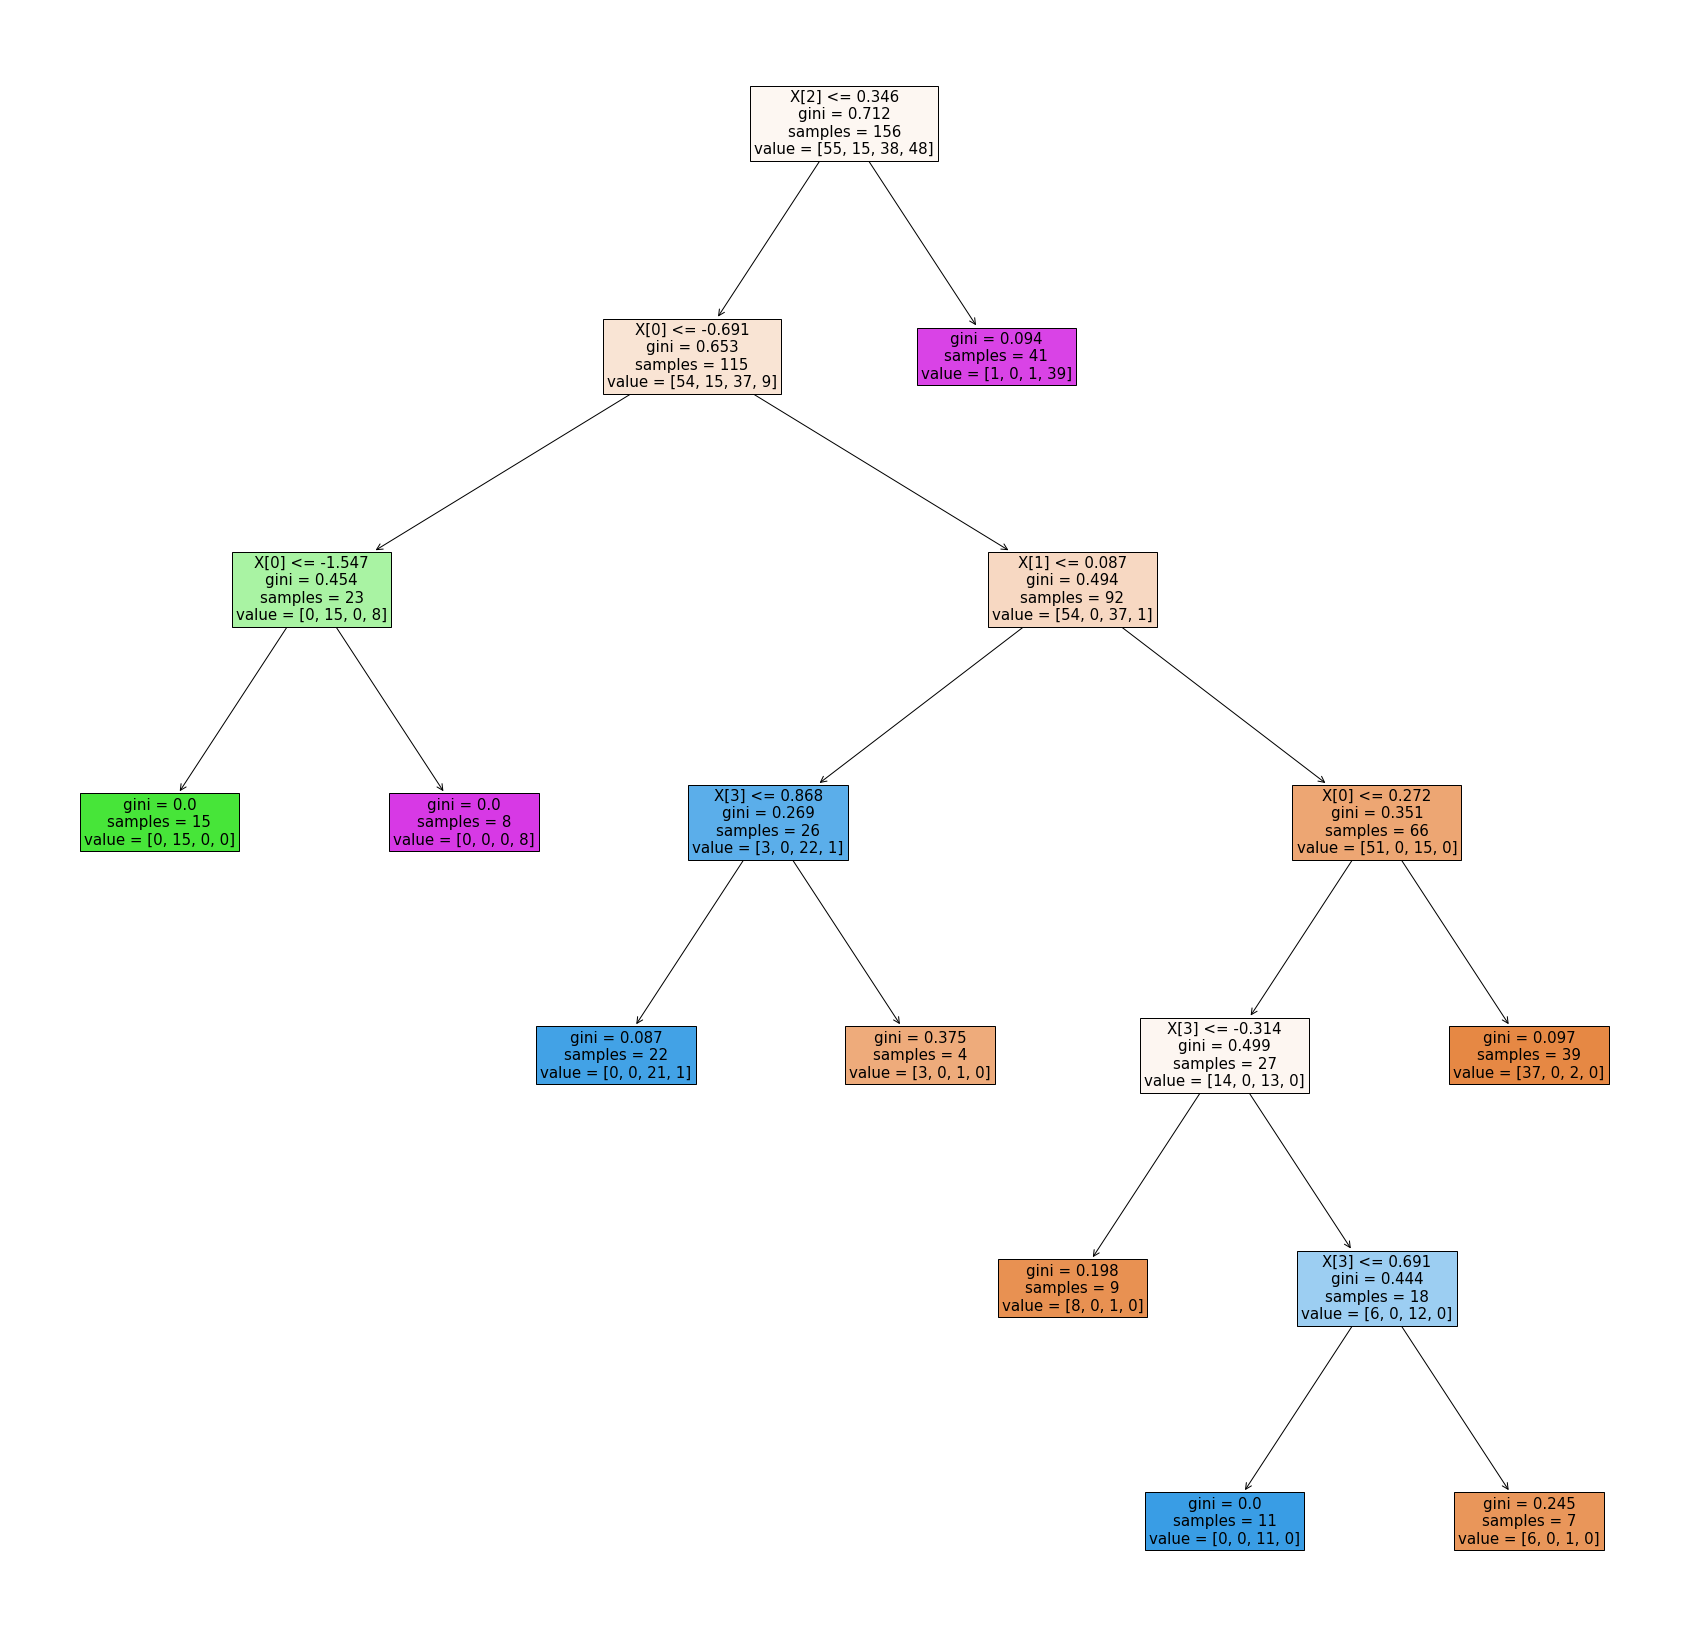

In [62]:
%matplotlib inline
plt.subplots(figsize=(30, 30))
plot_tree(clf,filled=True, fontsize=15)
plt.show()

### ***Q3. Draw the decision boundaries for the two models above and consider their performance vis-a-vis the decision boundaries. Answer the following question in a text cell. What to report:***

- ***What do you notice in terms of the relationship between model performance and decision boundary for each model?***

In [25]:
data=df[['mass','width','height','color_score']].values
target_names=df.fruit_name.unique().astype('<U10')
classes = target_names
y=target
Y = df['fruit_name']
target=df['fruit_label'].to_numpy()

In [26]:
def plot_lg_decision_boundary(X,p):
  X = stats.zscore(X)
  X_train=X
  X_test=X
  y_train=y 
  y_test =y
  h = .02  # step size in the mesh
  n_neighbors = 5

  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFD43B'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFD43B'])



  clf = OneVsRestClassifier(LogisticRegressionCV())
  clf.fit(X_train,y_train).decision_function(X_test)
  dt_scores =cross_val_score(clf,X_train,y_train,cv=10)
  dt_scores=dt_scores.mean()

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  # plotting
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Logistic Regression Decision Boundary of fruit data with {f},{l} as features with a score of :{s} ".format(f=p[0],l=p[1],s=dt_scores))

  plt.show()

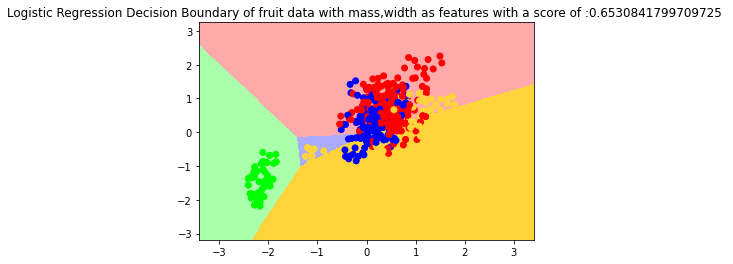

------------------------------------------------------------------------


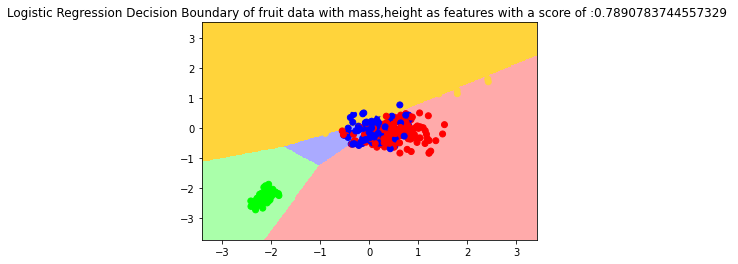

------------------------------------------------------------------------


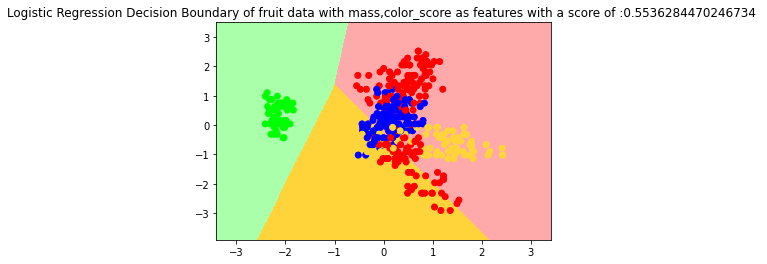

------------------------------------------------------------------------


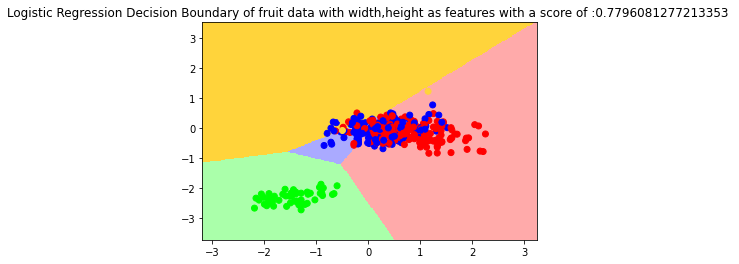

------------------------------------------------------------------------


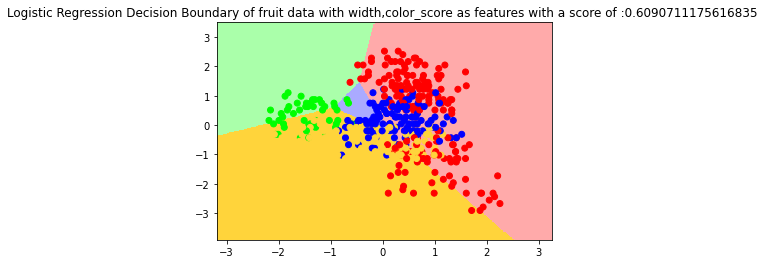

------------------------------------------------------------------------


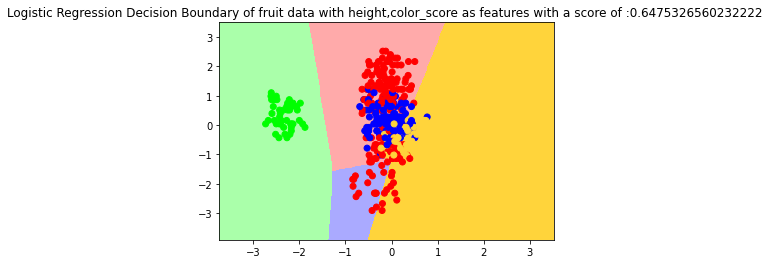

----------------------------x--------------------------------------------


In [27]:
X = df[['mass','width']].values
p=['mass','width']
plot_lg_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['mass','height']].values
p=['mass','height']
plot_lg_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['mass','color_score']].values
p=['mass','color_score']
plot_lg_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['width','height']].values
p=['width','height']
plot_lg_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['width','color_score']].values
p=['width','color_score']
plot_lg_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['height','color_score']].values
p=['height','color_score']
plot_lg_decision_boundary(X,p)
print('----------------------------x--------------------------------------------')

In [28]:
Y = df['fruit_name']
data=df[['mass','width','height','color_score']].values
target_names=df.fruit_name.unique().astype('<U10')
classes = target_names
y=target

In [29]:
def plot_decision_boundary(X,p):
  X = stats.zscore(X)
  X_train=X
  X_test=X
  y_train=y 
  y_test =y
  h = .02  # step size in the mesh
  n_neighbors = 5

  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#FFD43B'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFD43B'])



  clf = DecisionTreeClassifier(ccp_alpha=0.02).fit(X_train, y_train)
  acc_score=(clf.score(X_test, y_test))

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  # plotting
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Decision Tree Decision Boundary of fruit data with {f},{l} as features with a score of :{s} ".format(f=p[0],l=p[1],s=acc_score))

  plt.show()

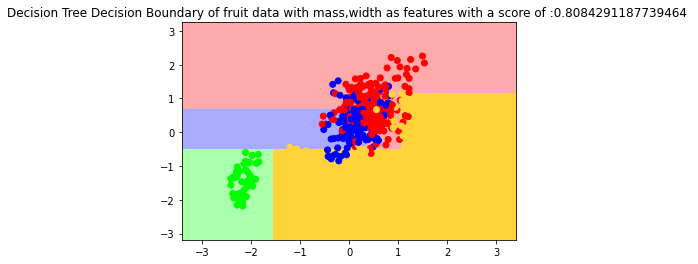

------------------------------------------------------------------------


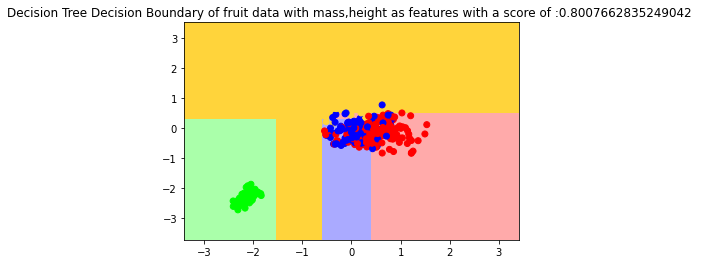

------------------------------------------------------------------------


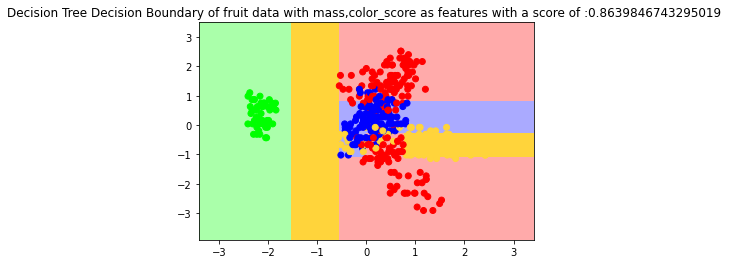

------------------------------------------------------------------------


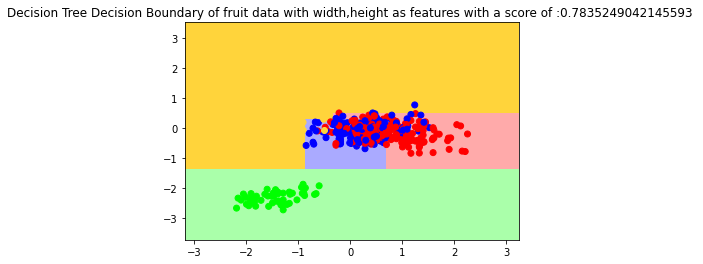

------------------------------------------------------------------------


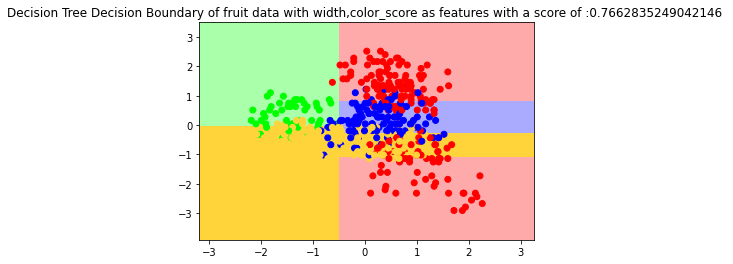

------------------------------------------------------------------------


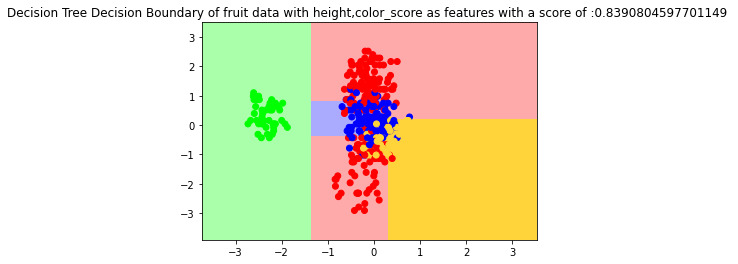

------------------------------------------------------------------------


In [30]:
X = df[['mass','width']].values
p=['mass','width']
plot_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['mass','height']].values
p=['mass','height']
plot_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['mass','color_score']].values
p=['mass','color_score']
plot_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['width','height']].values
p=['width','height']
plot_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['width','color_score']].values
p=['width','color_score']
plot_decision_boundary(X,p)
print('------------------------------------------------------------------------')
X = df[['height','color_score']].values
p=['height','color_score']
plot_decision_boundary(X,p)
print('------------------------------------------------------------------------')

***Report Here***

- First thing we can notice is that the decision tree performs much better than, logistic regression, 
- this could be because decision trees divide the data into regions but logistic regression wouldn’t divide into smaller regions.
- We can notice in both the types of classifier the better the boundary defines for that particular data (features ) included, the better is the model performance
- The models that perform better, divide the different classes of the fruit data into better decision boundaries/regions 






---
###***Good Job! You are done here!***